In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("fivethirtyeight")  # For plots

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
ss = pd.read_csv("SampleSubmission.csv")

In [3]:
train.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3
1,2021-02-18 07:27:27,35,3890,200,18,138,3
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3
3,2021-02-19 12:02:11,14,3040,853,15,973,3
4,2021-03-21 09:37:26,14,5177,201,18,702,3


In [4]:
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910
1,User2784_Wed_3_12,2021-03-24 12:00:00,2784
2,User2290_Wed_3_6,2021-03-24 06:00:00,2290
3,User1720_Wed_3_6,2021-03-24 06:00:00,1720
4,User226_Wed_3_0,2021-03-24 00:00:00,226


In [5]:
ss.head()

,UserID_Day_Month_Hour,Target
0,User1_Wed_3_0,0
1,User1_Wed_3_6,0
2,User1_Wed_3_12,0
3,User1_Wed_3_18,0
4,User11_Wed_3_0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373621 entries, 0 to 1373620
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   eventdatetime     1373621 non-null  object
 1   event             1373621 non-null  int64 
 2   userid            1373621 non-null  int64 
 3   useremaildomain   1373621 non-null  int64 
 4   userrole          1373621 non-null  int64 
 5   companyprofileid  1373621 non-null  int64 
 6   country           1373621 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 73.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17004 entries, 0 to 17003
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   UserID_Day_Month_Hour  17004 non-null  object
 1   eventdatetime          17004 non-null  object
 2   userid                 17004 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 398.7+ KB


In [8]:
train["country"].value_counts()

3    672292
9    425773
2    123422
4     90092
5     62042
Name: country, dtype: int64

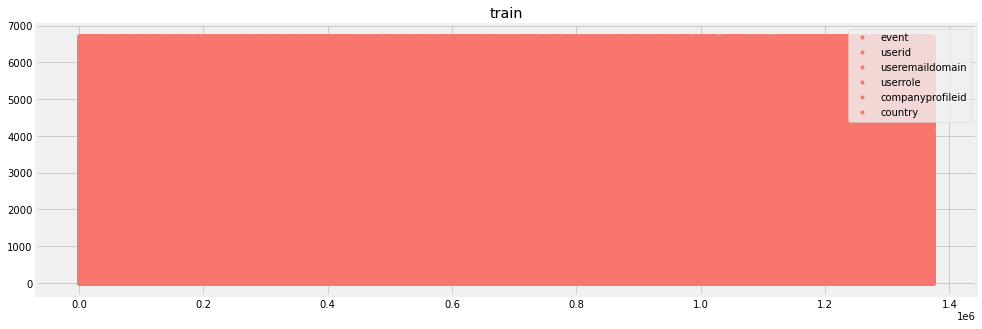

In [9]:
# Color pallete for plotting
color_pal = [
    "#F8766D",
    "#D39200",
    "#93AA00",
    "#00BA38",
    "#00C19F",
    "#00B9E3",
    "#619CFF",
    "#DB72FB",
]
train.plot(style=".", figsize=(15, 5), color=color_pal[0], title="train")
plt.show()

In [10]:
def create_features(df):
    df["eventdatetime"] = pd.to_datetime(df["eventdatetime"])
    df["hour"] = df["eventdatetime"].dt.hour
    df["dayofweek"] = df["eventdatetime"].dt.dayofweek
    df["quarter"] = df["eventdatetime"].dt.quarter
    df["month"] = df["eventdatetime"].dt.month
    df["year"] = df["eventdatetime"].dt.year
    df["dayofyear"] = df["eventdatetime"].dt.dayofyear
    df["dayofmonth"] = df["eventdatetime"].dt.day
    df["weekofyear"] = df["eventdatetime"].dt.weekofyear
    return df


train = create_features(train)
test = create_features(test)
train.head()

<ipython-input-10-a57e475f2729>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["weekofyear"] = df["eventdatetime"].dt.weekofyear
<ipython-input-10-a57e475f2729>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["weekofyear"] = df["eventdatetime"].dt.weekofyear


,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3,7,4,1,2,2021,50,19,7
1,2021-02-18 07:27:27,35,3890,200,18,138,3,7,3,1,2,2021,49,18,7
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,2,2,1,2,2021,55,24,8
3,2021-02-19 12:02:11,14,3040,853,15,973,3,12,4,1,2,2021,50,19,7
4,2021-03-21 09:37:26,14,5177,201,18,702,3,9,6,1,3,2021,80,21,11


In [11]:
test.head()

,UserID_Day_Month_Hour,eventdatetime,userid,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910,18,2,1,3,2021,83,24,12
1,User2784_Wed_3_12,2021-03-24 12:00:00,2784,12,2,1,3,2021,83,24,12
2,User2290_Wed_3_6,2021-03-24 06:00:00,2290,6,2,1,3,2021,83,24,12
3,User1720_Wed_3_6,2021-03-24 06:00:00,1720,6,2,1,3,2021,83,24,12
4,User226_Wed_3_0,2021-03-24 00:00:00,226,0,2,1,3,2021,83,24,12


In [12]:
train.shape, test.shape

((1373621, 15), (17004, 11))